In [1]:
import numpy as np

def distancia_euclidiana(a, b):
    return np.linalg.norm(a - b)

def U(S, alpha=2):
    U_value = 0
    for i in range(len(S)):
        for j in range(len(S)):
            if i != j:
                U_value += distancia_euclidiana(S[i], S[j]) ** alpha
    return U_value

def algoritmo_avaro(A, n, alpha=2):
    A = np.array(A)
    while len(A) > n:
        # Calcular la contribución de cada punto
        contribuciones = []
        for i in range(len(A)):
            A_sin_i = np.delete(A, i, axis=0)
            contribucion = U(A) - U(A_sin_i)
            contribuciones.append(contribucion)
        
        # Encontrar el punto con la menor contribución y eliminarlo
        indice_min = np.argmin(contribuciones)
        A = np.delete(A, indice_min, axis=0)
    
    return A

# Ejemplo de uso
A = [
    [1, 2], 
    [3, 4], 
    [5, 6], 
    [7, 8], 
    [9, 10]
]
n = 3
alpha = 2
resultado = algoritmo_avaro(A, n, alpha)
print("Subconjunto resultante:", resultado)


Subconjunto resultante: [[ 1  2]
 [ 7  8]
 [ 9 10]]


In [5]:
import numpy as np

def distancia_euclidiana(a, b):
    return np.linalg.norm(a - b)

def U_incremental(A, alpha=2):
    m = len(A)
    matriz_distancias = np.zeros((m, m))
    
    # Calcula todas las distancias entre puntos y la suma inicial de U(A)
    U_value = 0
    for i in range(m):
        for j in range(i + 1, m):
            d = distancia_euclidiana(A[i], A[j])
            matriz_distancias[i][j] = d ** alpha
            U_value += matriz_distancias[i][j]
    
    return U_value, matriz_distancias

def algoritmo_avaro(A, n, alpha=2):
    A = np.array(A)
    U_value, matriz_distancias = U_incremental(A, alpha)
    
    while len(A) > n:
        # Calcular la contribución de cada punto de forma incremental
        contribuciones = []
        for i in range(len(A)):
            contribucion = 0
            for j in range(len(A)):
                if i != j:
                    contribucion += matriz_distancias[min(i, j)][max(i, j)]
            contribuciones.append(contribucion)
        
        # Encontrar el punto con la menor contribución y eliminarlo
        indice_min = np.argmin(contribuciones)
        A = np.delete(A, indice_min, axis=0)
        matriz_distancias = np.delete(matriz_distancias, indice_min, axis=0)
        matriz_distancias = np.delete(matriz_distancias, indice_min, axis=1)
    
    return A

# Ejemplo de uso
A = np.loadtxt('ZCAT1_1000_02D.pof')
n = 100
alpha = 2
resultado = algoritmo_avaro(A, n, alpha)
print("Subconjunto resultante:", resultado)
print("Tamaño del subconjunto resultante:", len(resultado))


Subconjunto resultante: [[9.983411e-01 6.635602e-03]
 [9.991938e-01 3.224850e-03]
 [1.215186e-02 3.951393e+00]
 [9.993770e-01 2.491829e-03]
 [2.809827e-02 3.887607e+00]
 [9.966479e-01 1.340836e-02]
 [3.049289e-02 3.878028e+00]
 [5.337308e-02 3.786508e+00]
 [3.285527e-03 3.986858e+00]
 [3.818296e-02 3.847268e+00]
 [2.010495e-02 3.919580e+00]
 [3.491227e-03 3.986035e+00]
 [9.988326e-01 4.669482e-03]
 [2.791164e-02 3.888353e+00]
 [1.827846e-03 3.992689e+00]
 [1.185822e-03 3.995257e+00]
 [9.999924e-01 3.039020e-05]
 [3.722242e-02 3.851110e+00]
 [9.978678e-01 8.528986e-03]
 [3.979093e-02 3.840836e+00]
 [9.991359e-01 3.456415e-03]
 [3.946411e-02 3.842144e+00]
 [9.999681e-01 1.274397e-04]
 [2.235827e-02 3.910567e+00]
 [9.984520e-01 6.192112e-03]
 [9.997202e-01 1.119281e-03]
 [9.999407e-01 2.370546e-04]
 [9.967505e-01 1.299784e-02]
 [3.818959e-02 3.847242e+00]
 [9.979987e-01 8.005392e-03]
 [9.964310e-01 1.427612e-02]
 [2.218660e-02 3.911254e+00]
 [3.979657e-02 3.840814e+00]
 [9.991199e-01 3.52

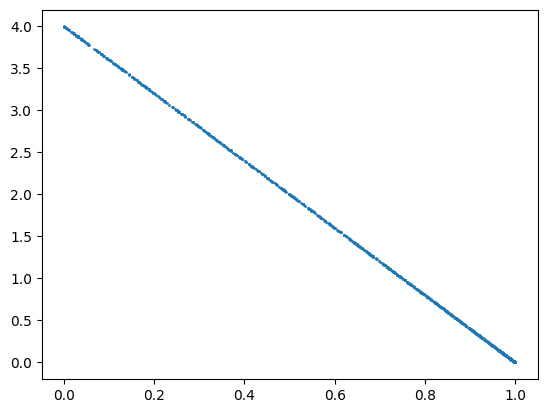

In [6]:
import matplotlib.pyplot as plt
plt.scatter(A[:, 0], A[:, 1], s=1)

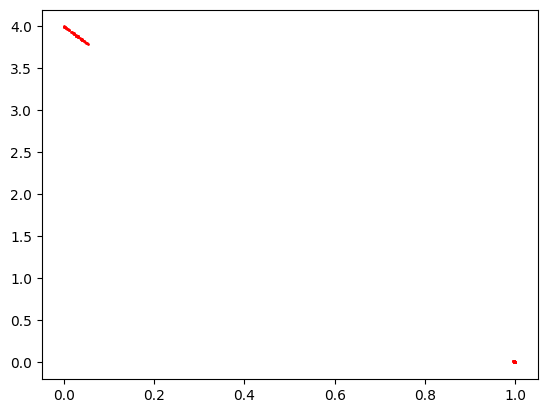

In [7]:
plt.scatter(resultado[:, 0], resultado[:, 1], s=1, color='red')